In [6]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [7]:
x, y =sp.symbols('x y')
f= x**2 + y**2 -4*x - 2*y + 5

grad_f= [sp.diff(f,var) for var in (x,y)]

critical_points =sp.solve(grad_f, (x,y))

print(f)
print(grad_f)
print(critical_points)

x**2 - 4*x + y**2 - 2*y + 5
[2*x - 4, 2*y - 2]
{x: 2, y: 1}


In [10]:
def gradient_descent(f_grad,initial_point, learning_rate, iterations):
    f_grad_funcs = [sp.lambdify((x,y), grad) for grad in f_grad]
    point=np.array(initial_point,dtype=float)
    points= [point]
    
    for _ in range(iterations):
        grad_values=np.array([grad(*point) for grad in f_grad_funcs])
        point=point-learning_rate*grad_values
        points.append(point)
        
    return np.array(points)

In [11]:
initial_point= [0,0]
learning_rate=0.1
iterations=50

points = gradient_descent(grad_f,initial_point,learning_rate,iterations)

<function matplotlib.pyplot.show(close=None, block=None)>

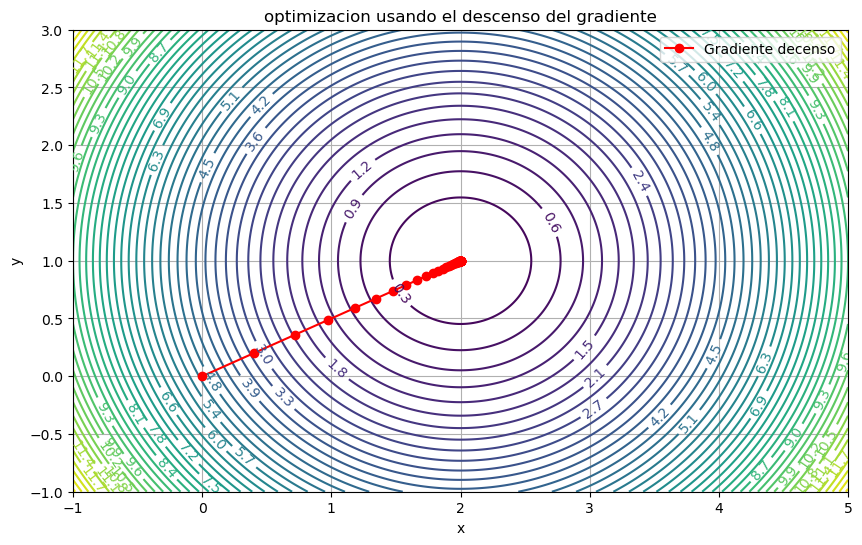

In [13]:
x_vals=np.linspace(-1,5,400)
y_vals=np.linspace(-1,3,400)
X,Y=np.meshgrid(x_vals,y_vals)
Z=X**2 + Y**2 - 4*X -2*Y +5

plt.figure(figsize=(10,6))
contour=plt.contour(X,Y,Z,levels=50)
plt.clabel(contour,inline=1,fontsize=10)
plt.plot(points[:,0],points[:,1],'ro-',label='Gradiente decenso')
plt.xlabel('x')
plt.ylabel('y')
plt.title('optimizacion usando el descenso del gradiente')
plt.legend()
plt.grid(True)
plt.show
